pengenalan statistika

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## central tendency

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df[['Height','Weight']] = df[['Height','Weight']].astype(int)
df.head()

,Gender,Height,Weight
0,Male,73,241
1,Male,68,162
2,Male,74,212
3,Male,71,220
4,Male,69,206


In [6]:
print(df['Height'].mean())
print(df['Height'].median())
print(df['Height'].mode()[0])

65.8662
66.0
67


In [7]:
def print_skew(x):
    print(f'{x.name} skew: {x.skew()}')
    print(f'{x.name} kurtosis: {x.kurtosis()}')
    if x.skew() >= 0.5:
        print(f'{x.name} is skewed right')
    elif x.skew() < -0.5:
        print(f'{x.name} is skewed left')
    else:
        print('normal distribution')

In [8]:
from scipy.stats import norm

def visualize_data(data):
    print_skew(data)
    plt.hist(data, bins=25, rwidth=1,density=True)
    plt.xlabel(f'{data.name}')
    plt.ylabel('Frequency')

    rng = np.arange(data.min(), data.max(), 0.1)
    plt.plot(rng, norm.pdf(rng, data.mean(), data.std()), 'r-', label='Normal distribution')
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(data.mode()[0], color='magenta', linestyle='dashed', linewidth=2, label='Mode')
    plt.legend(['normal distribution', 'Mean', 'Median', 'Mode'])
    plt.show()



Height skew: 0.043708363993048636
Height kurtosis: -0.47356575433384096
normal distribution


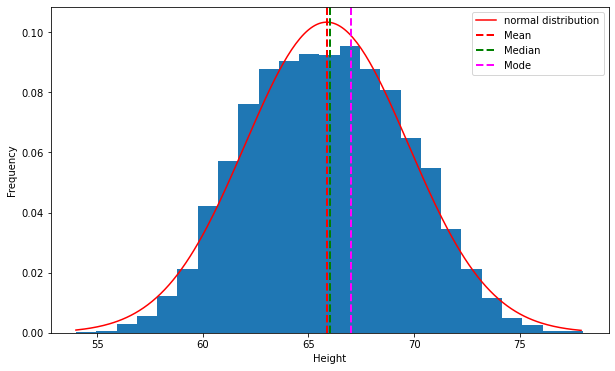

In [9]:
visualize_data(df['Height'])

In [10]:
n,bins = np.histogram(df['Height'], bins=20)
for i in range(0,len(n)):
    print(f'bin border - {bins[i]} | {bins[i+1]} | {n[i]}')

bin border - 54.0 | 55.2 | 10
bin border - 55.2 | 56.4 | 27
bin border - 56.4 | 57.6 | 54
bin border - 57.6 | 58.8 | 118
bin border - 58.8 | 60.0 | 204
bin border - 60.0 | 61.2 | 955
bin border - 61.2 | 62.4 | 732
bin border - 62.4 | 63.6 | 842
bin border - 63.6 | 64.8 | 868
bin border - 64.8 | 66.0 | 890
bin border - 66.0 | 67.2 | 1802
bin border - 67.2 | 68.4 | 844
bin border - 68.4 | 69.6 | 776
bin border - 69.6 | 70.8 | 623
bin border - 70.8 | 72.0 | 526
bin border - 72.0 | 73.2 | 533
bin border - 73.2 | 74.4 | 111
bin border - 74.4 | 75.6 | 47
bin border - 75.6 | 76.8 | 26
bin border - 76.8 | 78.0 | 12


## outlier dengan std

In [11]:
df.Height.var()

14.901787738773884

In [12]:
df.Height.std()

3.8602833754497716

In [13]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.44705012634932

In [14]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.28534987365069

In [15]:
# outlier

outlier_std = df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]
outlier_std

,Gender,Height,Weight
994,Male,78,255
1317,Male,78,227
2014,Male,78,269
3285,Male,78,253
3757,Male,78,245
6624,Female,54,71
7294,Female,54,78
9285,Female,54,64


In [16]:
outlier_std.shape[0]

8

In [17]:
df.shape

(10000, 3)

In [18]:
df_no_outlier = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
df_no_outlier.shape

(9992, 3)

## outlier z score

untuk distribusi normal

In [19]:
df['zscore'] = (df['Height'] - df['Height'].mean())/df['Height'].std()
df

,Gender,Height,Weight,zscore
0,Male,73,241,1.847999
1,Male,68,162,0.552757
2,Male,74,212,2.107047
3,Male,71,220,1.329902
4,Male,69,206,0.811806
...,...,...,...,...
9995,Female,66,136,0.034661
9996,Female,67,170,0.293709
9997,Female,63,128,-0.742484
9998,Female,69,163,0.811806


#### ini untuk yang pakai z score

In [20]:
df[(df['zscore'] <-3 ) | (df['zscore'] > 3)]

,Gender,Height,Weight,zscore
994,Male,78,255,3.143241
1317,Male,78,227,3.143241
2014,Male,78,269,3.143241
3285,Male,78,253,3.143241
3757,Male,78,245,3.143241
6624,Female,54,71,-3.073919
7294,Female,54,78,-3.073919
9285,Female,54,64,-3.073919


<AxesSubplot:>

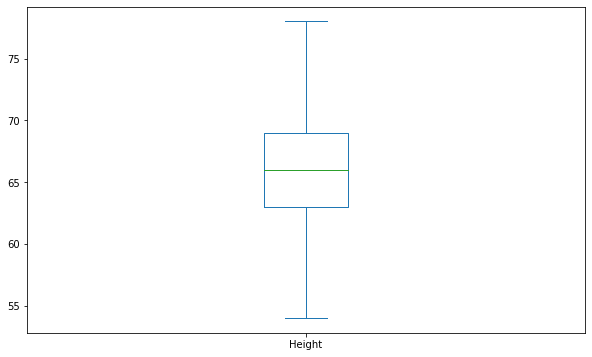

In [21]:
df['Height'].plot(kind='box')

In [22]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1,Q3

(63.0, 69.0)

In [23]:
IQR = Q3 - Q1
IQR

6.0

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(54.0, 78.0)

In [25]:
outlier_iqr = df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]
outlier_iqr

,Gender,Height,Weight,zscore


# Statistika with sql


---